In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
water_data=pd.read_csv('water_potability.csv')
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
water_data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [4]:
water_data.shape

(3276, 10)

In [5]:
water_data.dtypes

,0
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


In [6]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [20]:
water_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [21]:
water_data.duplicated().any()

np.False_

,ph
0,NaN
1,5.716080
2,10.099124
3,10.316766
4,11.092223
...,...
3271,6.668102
3272,9.808856
3273,11.419510
3274,7.126763


In [22]:
water_data.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [23]:
null_df=water_data.isnull().sum().reset_index()
null_df.columns=["Column","Null Count"]
null_df["%miss_value"]=round(null_df["Null Count"]/len(water_data),2)*100
null_df

,Column,Null Count,%miss_value
0,ph,491,15.0
1,Hardness,0,0.0
2,Solids,0,0.0
3,Chloramines,0,0.0
4,Sulfate,781,24.0
5,Conductivity,0,0.0
6,Organic_carbon,0,0.0
7,Trihalomethanes,162,5.0
8,Turbidity,0,0.0
9,Potability,0,0.0


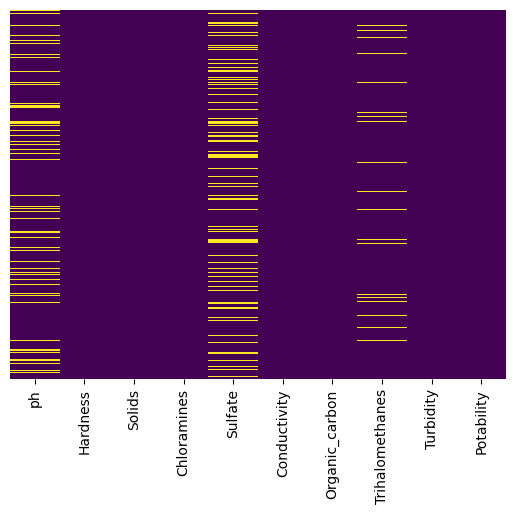

In [25]:
sns.heatmap(water_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

## Handling Missing Values


<Axes: ylabel='Frequency'>

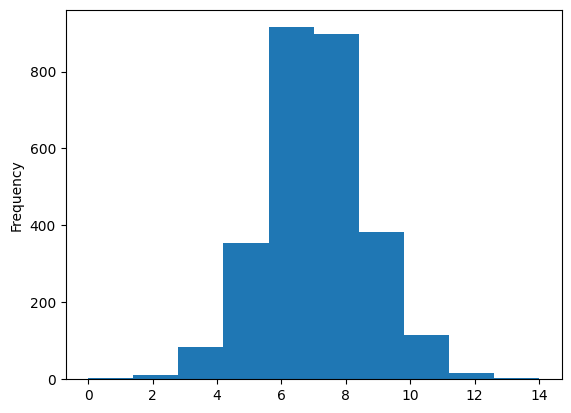

In [26]:
water_data["ph"].plot(kind="hist")

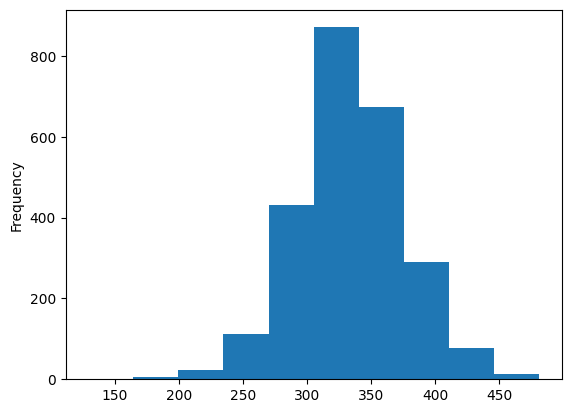

In [31]:
water_data["Sulfate"].plot(kind="hist")
plt.show()

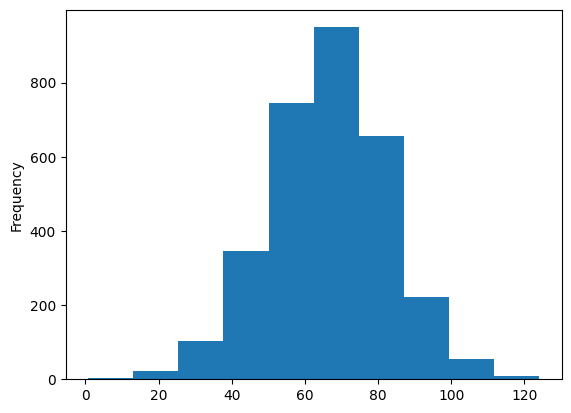

In [32]:
water_data["Trihalomethanes"].plot(kind="hist")
plt.show()

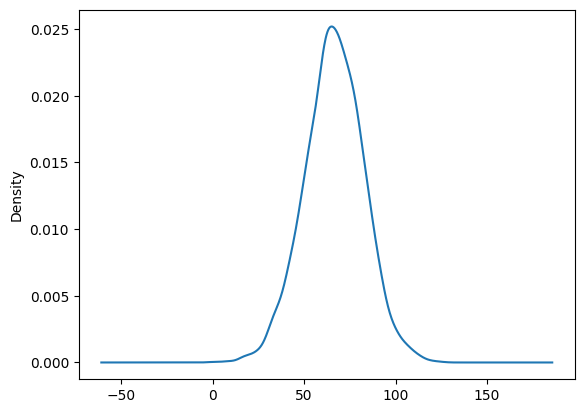

In [33]:
fig=plt.figure()
ax=fig.add_subplot(111)
water_data["Trihalomethanes"].plot(kind="kde",ax=ax)
plt.show()

In [34]:
water_data["ph"]=water_data["ph"].fillna(water_data["ph"].mean())
water_data["Sulfate"]=water_data["Sulfate"].fillna(water_data["Sulfate"].mean())
water_data["Trihalomethanes"]=water_data["Trihalomethanes"].fillna(water_data["Trihalomethanes"].mean())

In [35]:
water_data.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


## Check for Correlation

In [36]:
corr_matrix=water_data.corr()
corr_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


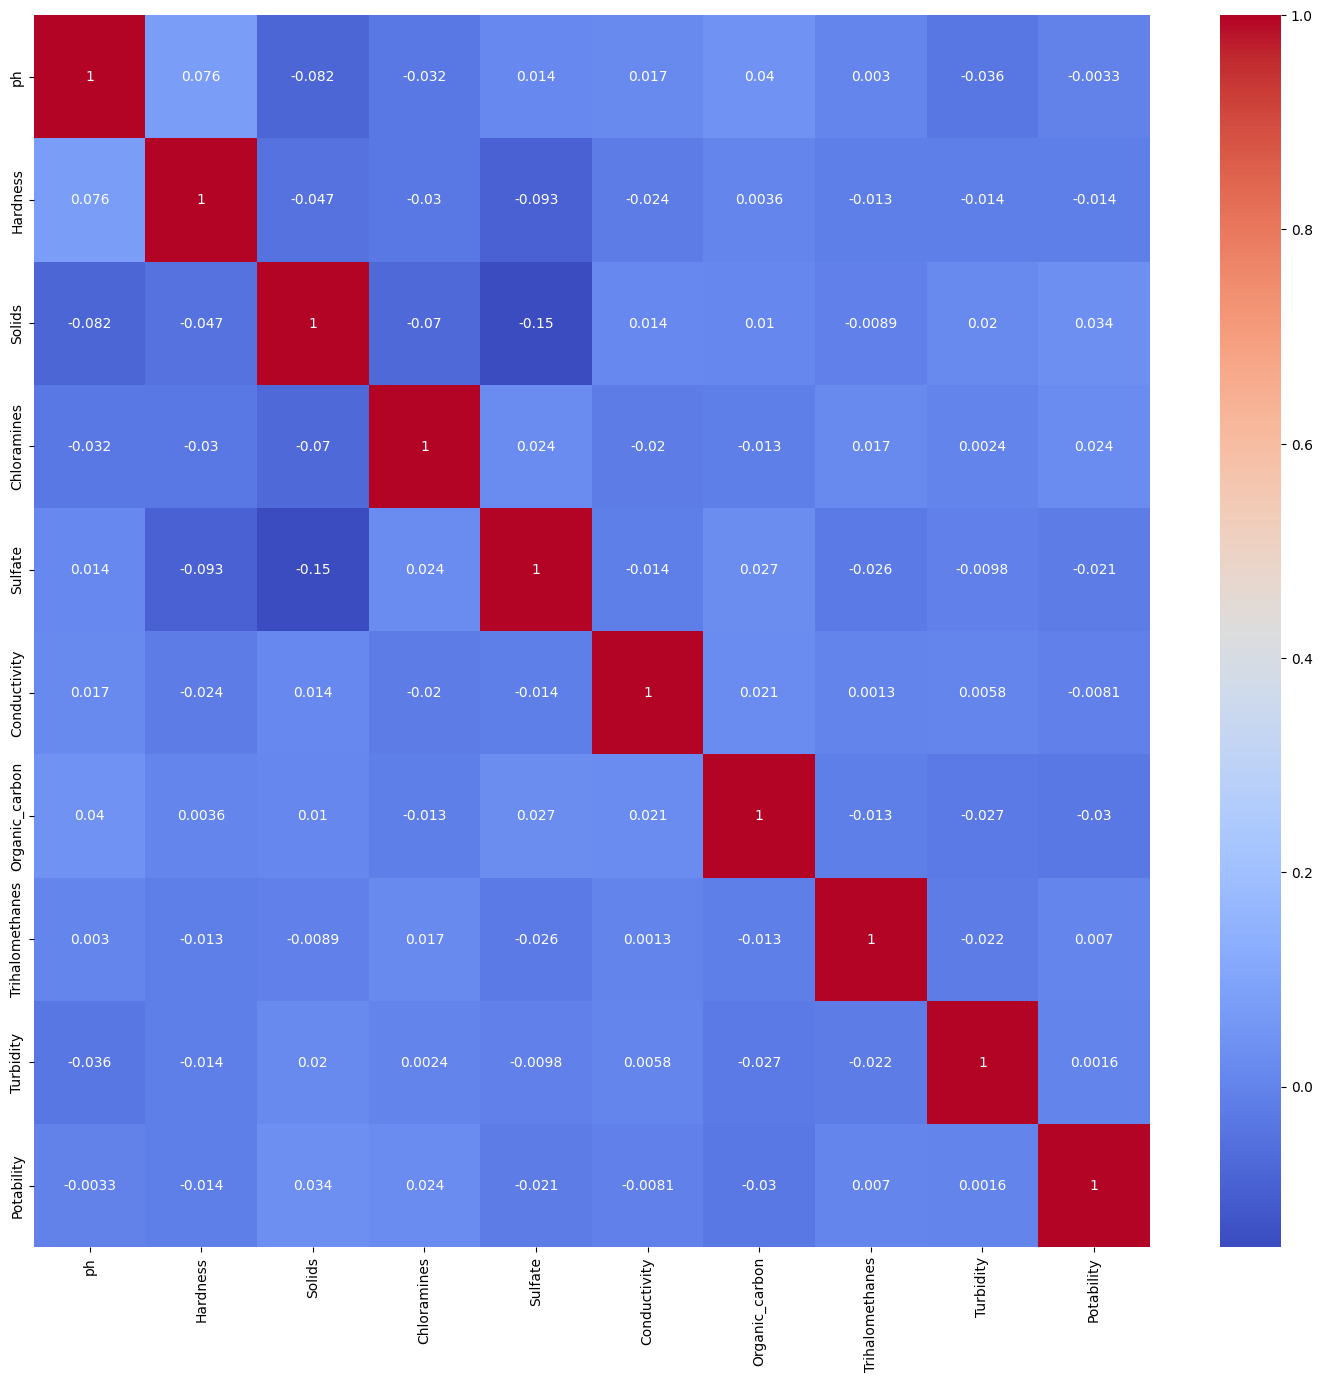

In [37]:
plt.figure(figsize=(18,16))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.show()

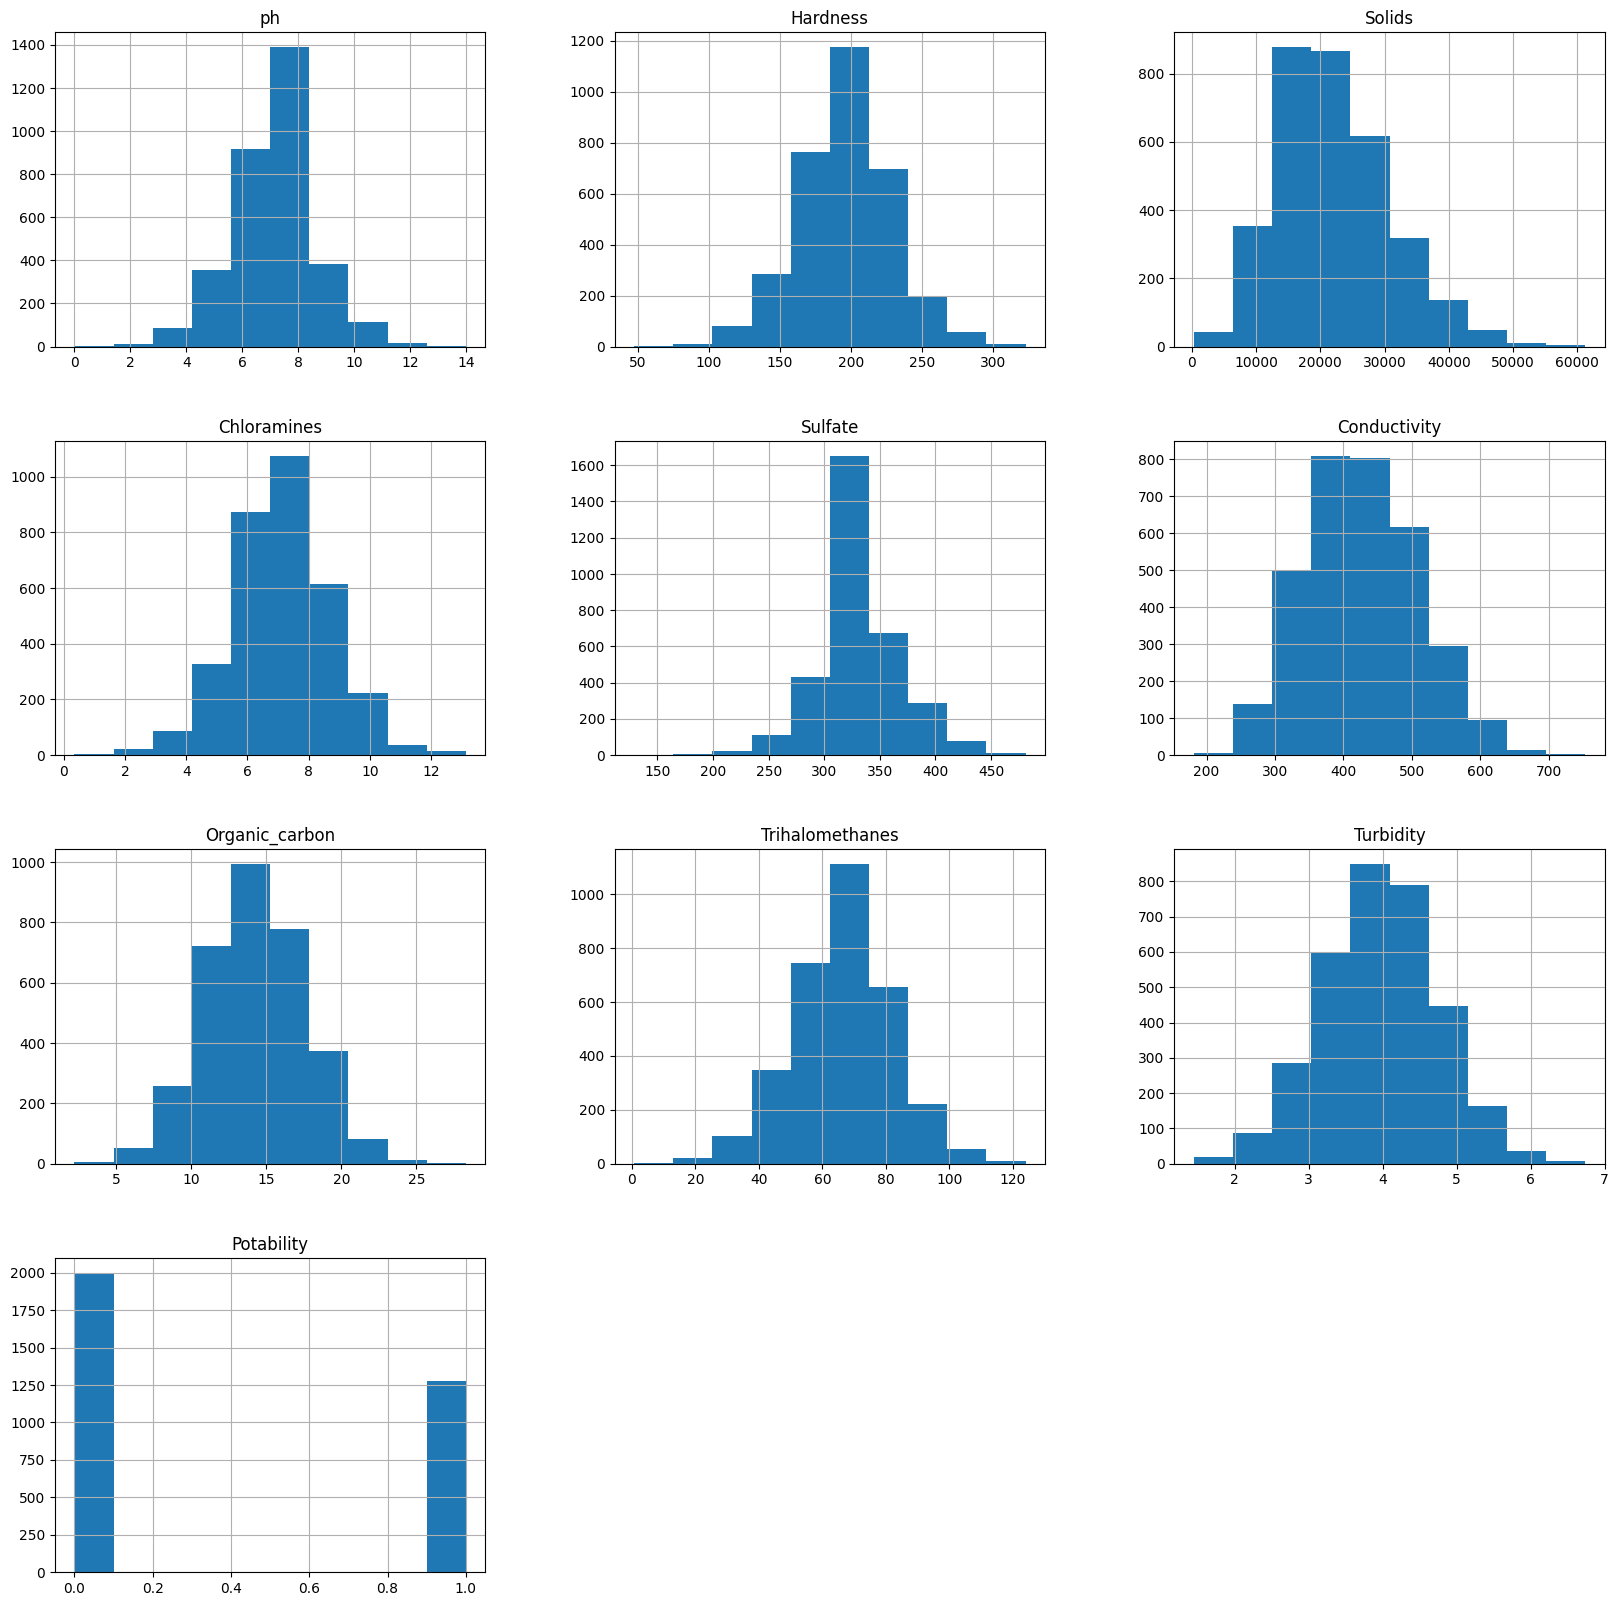

In [38]:
data_hist_plot=water_data.hist(figsize=(20,20))
plt.show()

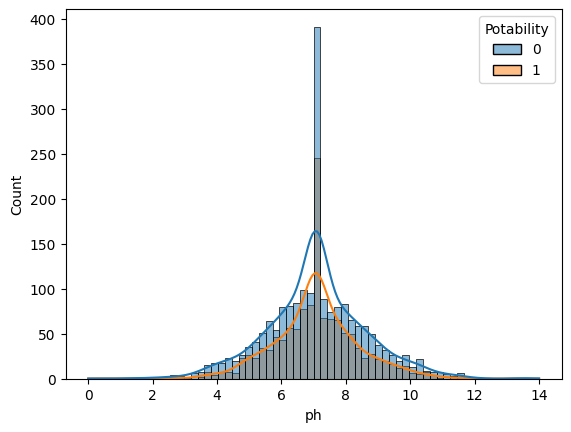

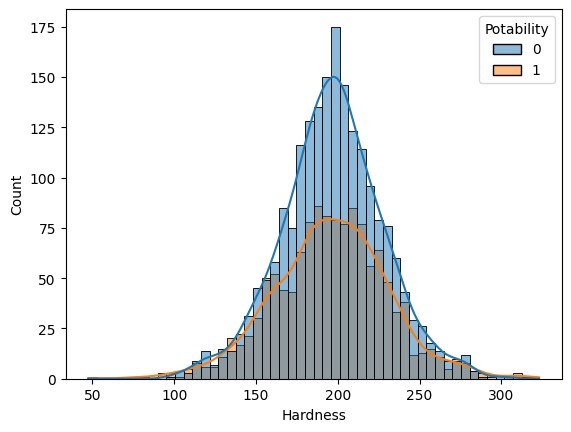

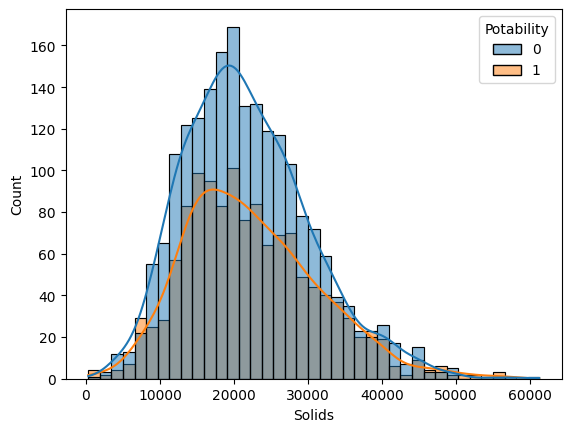

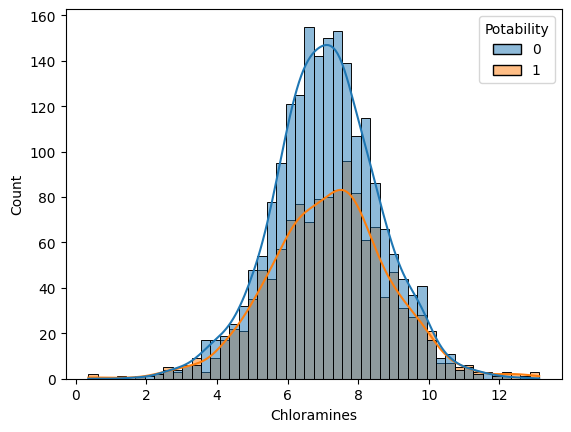

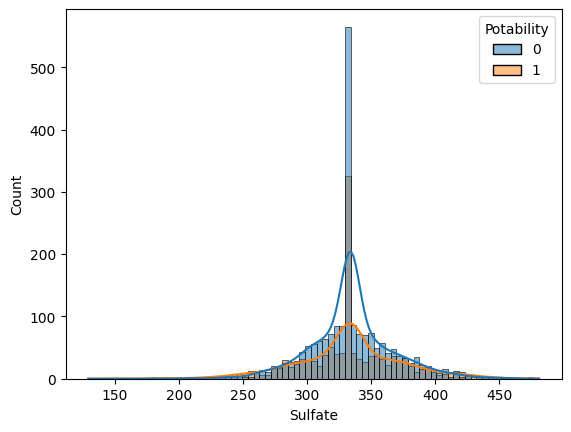

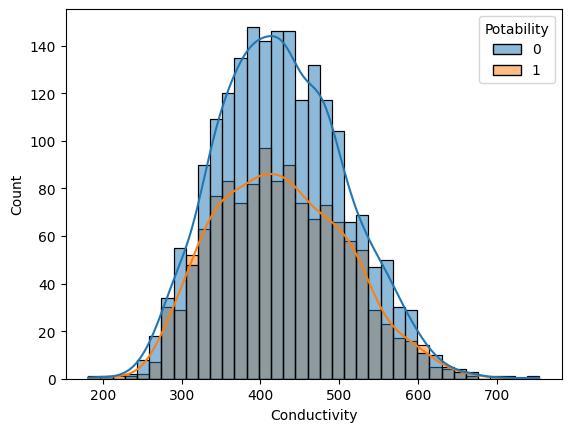

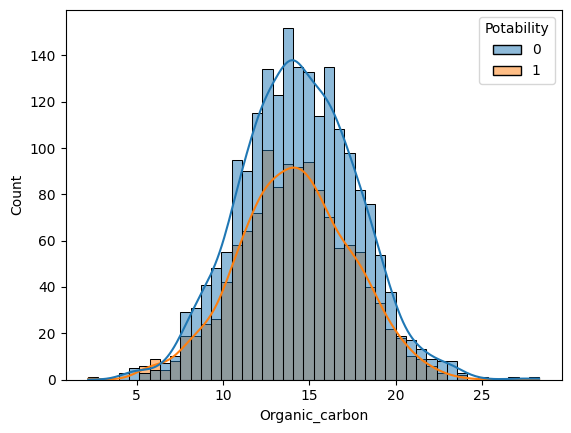

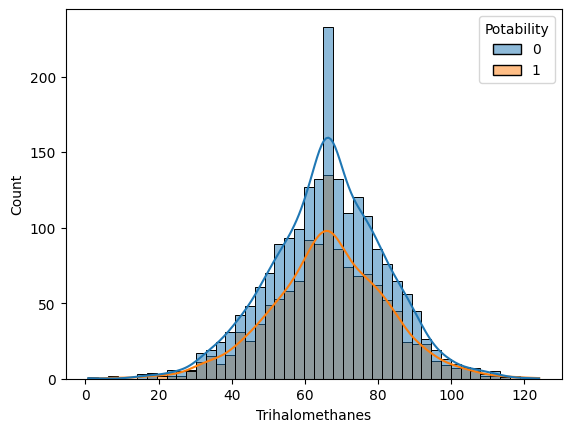

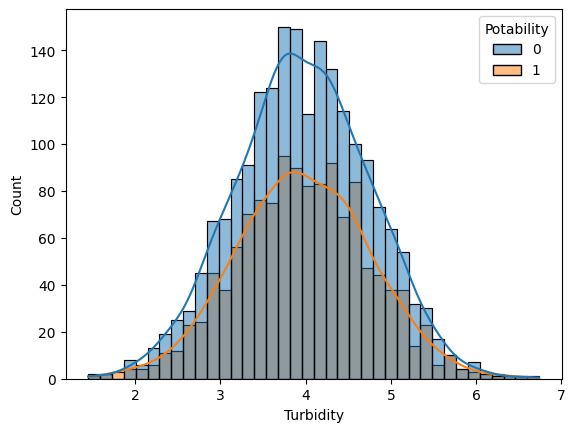

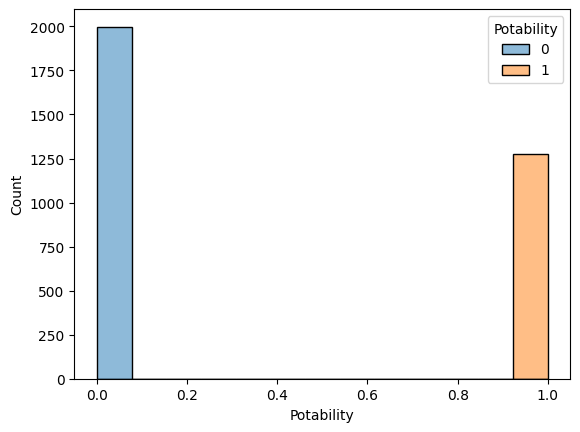

In [39]:
for col in water_data.columns:
  sns.histplot(data=water_data,x=col,kde=True,hue="Potability")
  plt.show()

In [40]:
water_data.groupby("Potability").mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.084658,196.733292,21777.490788,7.092175,334.371700,426.730454,14.364335,66.308522,3.965800
1,7.074754,195.800744,22383.991018,7.169338,332.844122,425.383800,14.160893,66.533513,3.968328


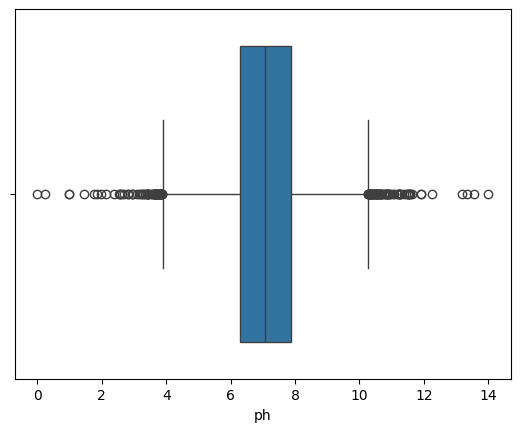

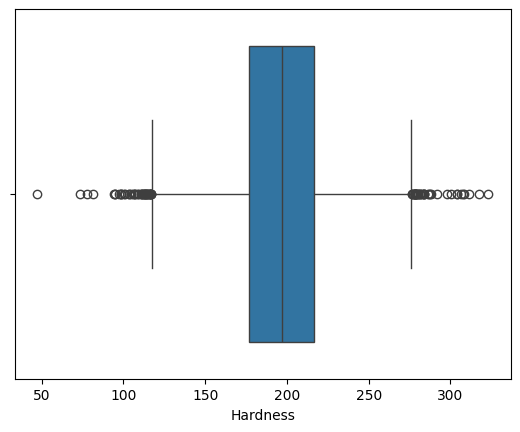

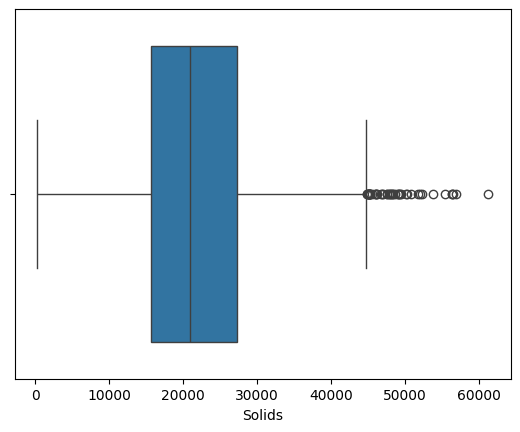

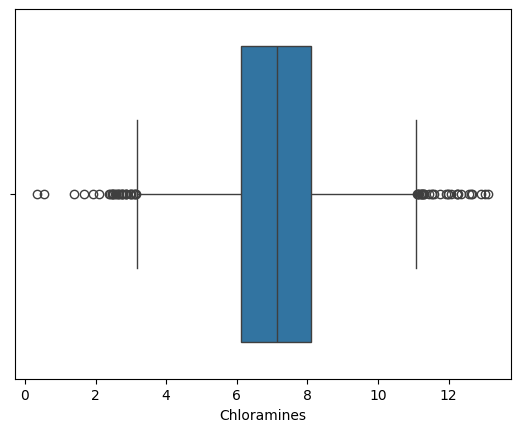

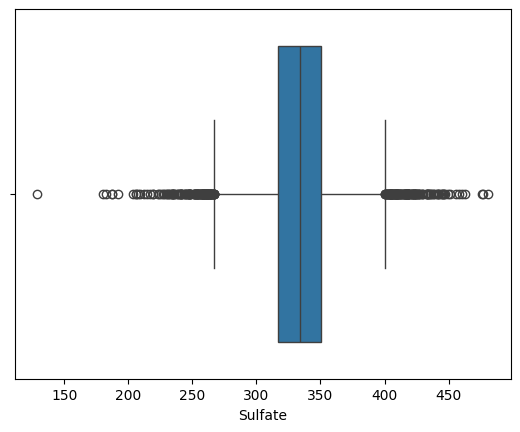

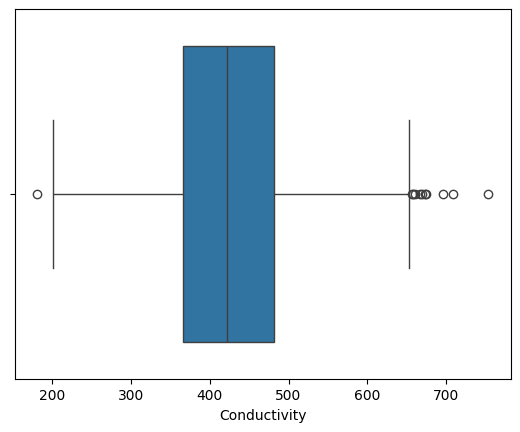

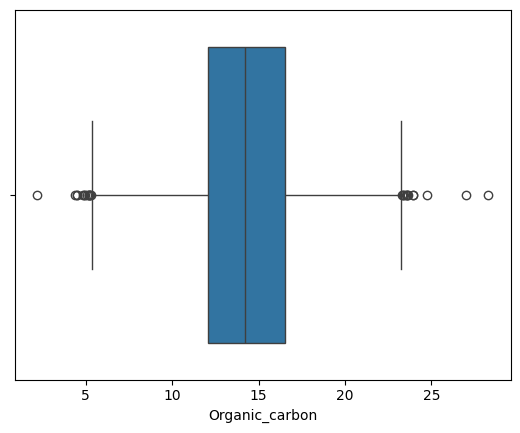

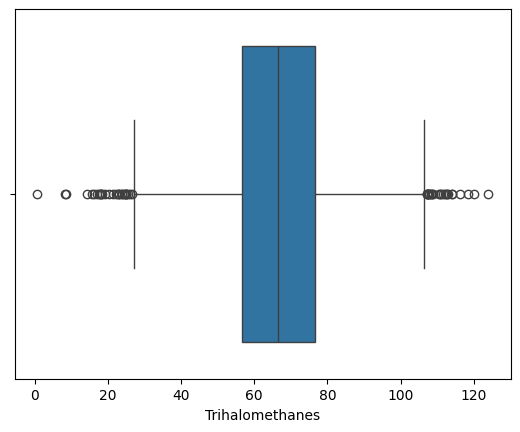

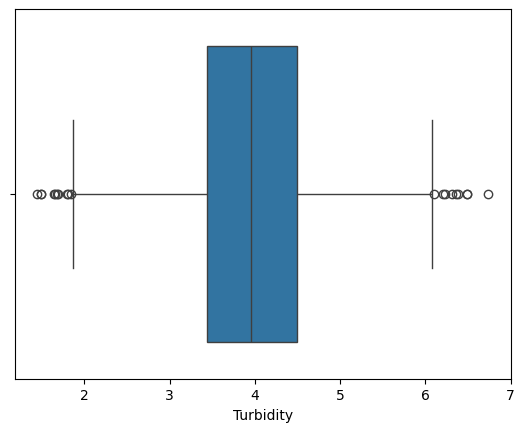

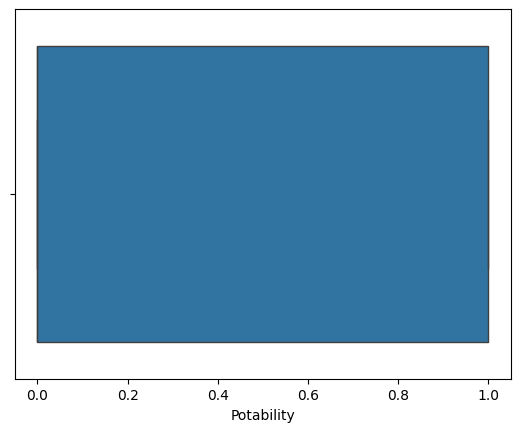

In [41]:
for col in water_data:
  sns.boxplot(data=water_data,x=col)
  plt.show()

In [44]:
water_data["Potability"].value_counts()


,count
Potability,
0,1998
1,1278


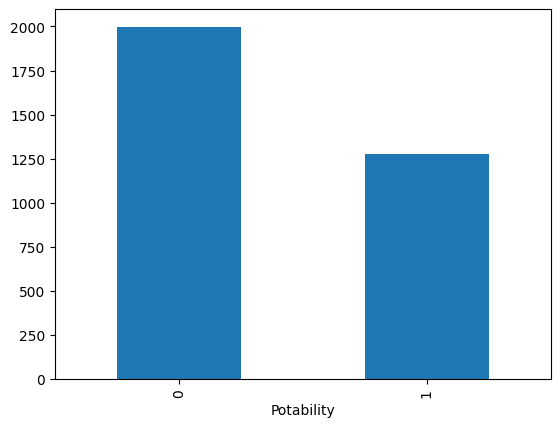

In [48]:
water_data["Potability"].value_counts().plot(kind="bar")
plt.show()

## Data Preprocessing

In [45]:
from re import X
X = water_data.drop(columns=["Potability"])
y = water_data["Potability"]

In [46]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [47]:
y.head()

,Potability
0,0
1,0
2,0
3,0
4,0


## Feature Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)
X_scaled

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

## Trainning and testing dataset

In [50]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42,stratify=y)

In [51]:
X_train.shape,X_test.shape

((2620, 9), (656, 9))

## Model Development
1.LogisticRegression
2.DecisionTreeClassifier
3.RandomForestClassifier
4.ExtraTreesClassifier
5.Support Vector Classifier
6.KNeighboursClassifiers
7.GradientBoostingClassifier
8.Naive-Bayes
9.AdaBoostClassifier

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB


## Creating object of model

In [53]:
LR=LogisticRegression()
DT=DecisionTreeClassifier()
RF=RandomForestClassifier()
ETC=ExtraTreesClassifier()
SVM=SVC()
KNN=KNeighborsClassifier()
GBC=GradientBoostingClassifier()
NB=GaussianNB()
ABC=AdaBoostClassifier()

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
models=[LR,DT,RF,ETC,SVM,KNN,GBC,NB,ABC]
features=X_scaled
labels=y
CV=5
accu_list=[] #Accuracy List
ModelName=[] #Model Name List
for model in models:
  model_name=model.__class__.__name__
  accuracies=cross_val_score(model,features,labels,cv=CV,scoring="accuracy")
  ModelName.append(model_name)
  accu_list.append(accuracies.mean()*100)

model_acc_df=pd.DataFrame({"Model":ModelName,"Cross_Val_Accuracy":accu_list})
model_acc_df

,Model,Cross_Val_Accuracy
0,LogisticRegression,61.019549
1,DecisionTreeClassifier,57.113014
2,RandomForestClassifier,63.523506
3,ExtraTreesClassifier,63.645643
4,SVC,65.080339
5,KNeighborsClassifier,59.340579
6,GradientBoostingClassifier,61.539332
7,GaussianNB,61.263871
8,AdaBoostClassifier,61.019177


In [56]:
from sklearn.metrics import classification_report

In [57]:
SVM.fit(X_train,y_train)
ETC.fit(X_train,y_train)
RF.fit(X_train,y_train)
y_pred_svm=SVM.predict(X_test)
y_pred_etc=ETC.predict(X_test)
y_pred_rf=RF.predict(X_test)


In [58]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.66      0.92      0.77       400
           1       0.69      0.27      0.39       256

    accuracy                           0.67       656
   macro avg       0.68      0.60      0.58       656
weighted avg       0.67      0.67      0.62       656



In [59]:
print(classification_report(y_test,y_pred_etc))

              precision    recall  f1-score   support

           0       0.67      0.93      0.78       400
           1       0.73      0.30      0.42       256

    accuracy                           0.68       656
   macro avg       0.70      0.61      0.60       656
weighted avg       0.70      0.68      0.64       656



In [61]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76       400
           1       0.64      0.29      0.40       256

    accuracy                           0.66       656
   macro avg       0.65      0.59      0.58       656
weighted avg       0.65      0.66      0.62       656



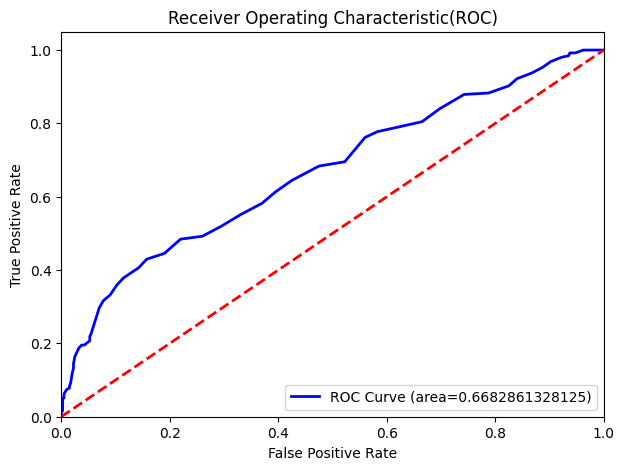

In [62]:
from sklearn.metrics import roc_curve,auc
y_scores=ETC.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_scores)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr,tpr,color="blue",lw=2,label=f"ROC Curve (area={roc_auc})")
plt.plot([0,1],[0,1],color="red",lw=2,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic(ROC)")
plt.legend(loc="lower right")
plt.show()

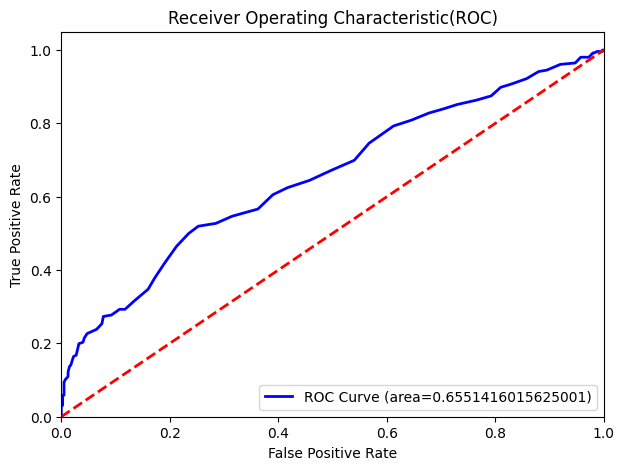

In [63]:
from sklearn.metrics import roc_curve,auc
y_scores=RF.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_scores)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr,tpr,color="blue",lw=2,label=f"ROC Curve (area={roc_auc})")
plt.plot([0,1],[0,1],color="red",lw=2,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic(ROC)")
plt.legend(loc="lower right")
plt.show()

## Best model Random forest

In [66]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

params_RF={"min_samples_split":[2,6],
           "min_samples_leaf":[1,4],
           "n_estimators":[100,200,300],
           "criterion":["gini","entropy"]}
cv_method=StratifiedKFold(n_splits=3)
GridSearchCV_RF=GridSearchCV(estimator=RandomForestClassifier(),
                             param_grid=params_RF,
                             cv=cv_method,
                             verbose=1,
                             n_jobs=2,
                             scoring="accuracy",
                             return_train_score=True)
GridSearchCV_RF.fit(X_train,y_train)
best_params_RF=GridSearchCV_RF.best_params_
print("Best Hyperparameters for Random Forest are=",best_params_RF)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters for Random Forest are= {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [67]:
best_estimator=GridSearchCV_RF.best_estimator_
best_estimator.fit(X_train,y_train)
y_pred_best=best_estimator.predict(X_test)
print(classification_report(y_test,y_pred_best))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       400
           1       0.67      0.30      0.42       256

    accuracy                           0.67       656
   macro avg       0.67      0.60      0.59       656
weighted avg       0.67      0.67      0.63       656



In [68]:
from sklearn.metrics import accuracy_score
print(f"Accuracy of Random Forest Model={round(accuracy_score(y_test,y_pred_best)*100,2)}%")

Accuracy of Random Forest Model=67.07%


## Predictive System

In [69]:
water_data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [70]:
list1=water_data.iloc[2:3,0:9].values.flatten().tolist()
list1

[8.099124189298397,
 224.23625939355776,
 19909.541732292397,
 9.275883602694089,
 333.7757766108135,
 418.6062130644815,
 16.868636929550973,
 66.42009251176368,
 3.0559337496641685]

In [71]:
ph=float(input("Enter Ph Value:"))
Hardness=float(input("Enter Hardness Value:"))
Solids=float(input("Enter Solids Value:"))
Chloramines=float(input("Enter Chloramines Value:"))
Sulfate=float(input("Enter Sulfate Value:"))
Conductivity=float(input("Enter Conductivity Value:"))
Organic_carbon=float(input("Enter Organic Carbon Value:"))
Trihalomethanes=float(input("Enter Trihalomethanes Value:"))
Turbidity=float(input("Enter Turbidity Value:"))

Enter Ph Value:67
Enter Hardness Value:445
Enter Solids Value:212
Enter Chloramines Value:231
Enter Sulfate Value:2323
Enter Conductivity Value:23
Enter Organic Carbon Value:23
Enter Trihalomethanes Value:3232
Enter Turbidity Value:312


In [72]:
input_data=[ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity]

In [73]:
water_data_input=std_scaler.transform([[ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity]])
water_data_input

array([[ 40.76880804,   7.56296423,  -2.48677022, 141.44023606,
         55.04659955,  -4.98943809,   2.63480452, 200.76796481,
        394.78111611]])

In [75]:
model_prediction=best_estimator.predict(water_data_input)
model_prediction

array([0])

In [76]:
if model_prediction[0]==0:
  print("Water is not SAFE for Consumption")
else:
  print("Water is SAFE for Consumption")

Water is not SAFE for Consumption


In [77]:
def Water_Quality_Prediction(input_data):
  scaled_data=std_scaler.transform([input_data])
  model_prediction=best_estimator.predict(scaled_data)
  if model_prediction[0]==0:
    print("Water is not SAFE for Consumption")
  else:
    print("Water is SAFE for Consumption")

In [79]:
ph=float(input("Enter Ph Value:"))
Hardness=float(input("Enter Hardness Value:"))
Solids=float(input("Enter Solids Value:"))
Chloramines=float(input("Enter Chloramines Value:"))
Sulfate=float(input("Enter Sulfate Value:"))
Conductivity=float(input("Enter Conductivity Value:"))
Organic_carbon=float(input("Enter Organic Carbon Value:"))
Trihalomethanes=float(input("Enter Trihalomethanes Value:"))
Turbidity=float(input("Enter Turbidity Value:"))

input_data=[ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity]
Water_Quality_Prediction(input_data)

Enter Ph Value:1
Enter Hardness Value:1
Enter Solids Value:1
Enter Chloramines Value:1
Enter Sulfate Value:1
Enter Conductivity Value:1
Enter Organic Carbon Value:1
Enter Trihalomethanes Value:1
Enter Turbidity Value:1
Water is SAFE for Consumption


## Save Trained Model

In [80]:
import pickle

In [81]:
filename="Water_Quality_ML_Trained_Model.sav"
pickle.dump(best_estimator,open(filename,"wb"))

## Load Trained Model

In [82]:
water_quality_model=pickle.load(open(filename,"rb"))